In [1]:
!pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 6.8 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from flaml import AutoML
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
url = "/content/drive/MyDrive/ML/AP Research/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Basic info
df.info()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics for numerical columns
print("Summary statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

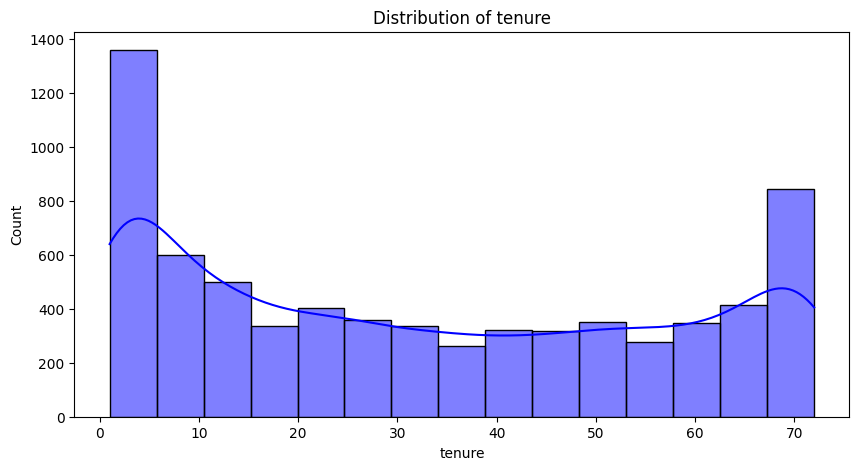

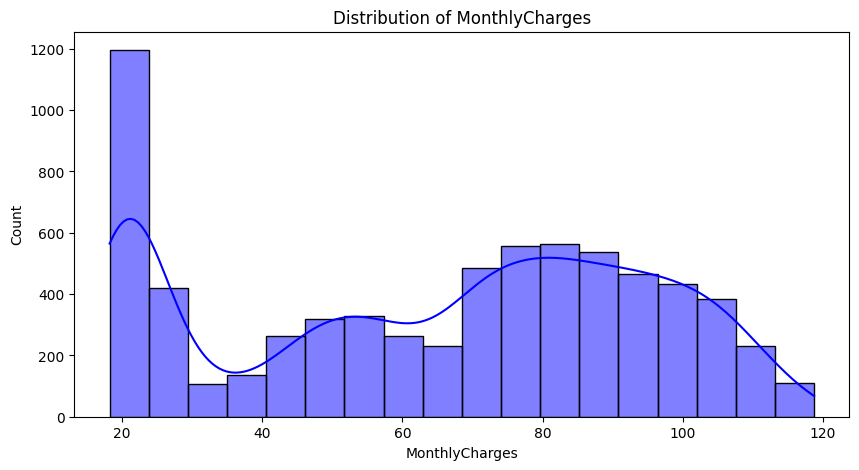

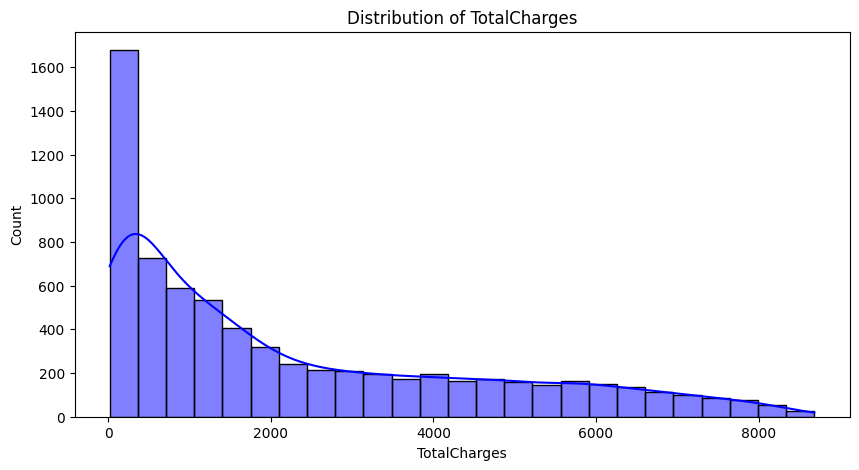

In [15]:
# List of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot numerical variables
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()


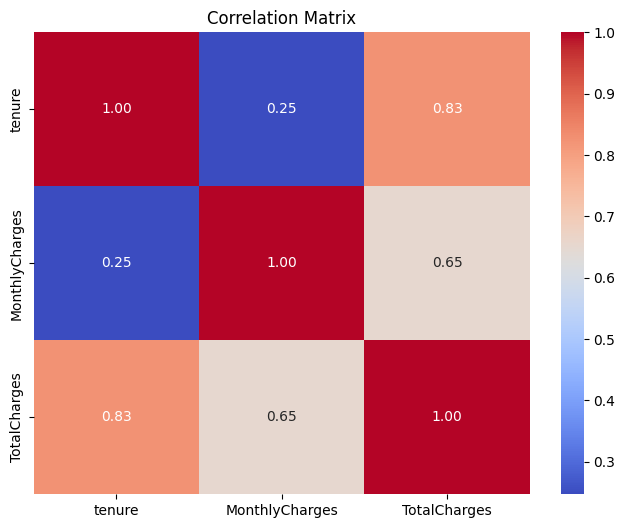

In [13]:
# Convert TotalCharges to numeric (if not already done)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Correlation matrix
corr_matrix = df[numerical_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [4]:
# Preprocessing
# Drop customerID as it's not useful for prediction
df.drop(columns=['customerID'], inplace=True)

# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the FLAML AutoML object
automl = AutoML()

# Set up FLAML settings
settings = {
    "time_budget": 900,  # Time budget in seconds (15 minutes)
    "metric": 'f1',  # Use F1 score as the evaluation metric
    "task": 'classification',  # Task type
    "seed": 42,  # Random seed for reproducibility
}

# Fit the model
automl.fit(X_train=X_train, y_train=y_train, **settings)

# Print the best model and hyperparameters
print("Best model:", automl.best_estimator)
print("Best hyperparameters:", automl.best_config)

[flaml.automl.logger: 02-10 16:00:31] {1728} INFO - task = classification
[flaml.automl.logger: 02-10 16:00:31] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 02-10 16:00:31] {1838} INFO - Minimizing error metric: 1-f1
[flaml.automl.logger: 02-10 16:00:31] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 02-10 16:00:31] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 02-10 16:00:32] {2393} INFO - Estimated sufficient time budget=1906s. Estimated necessary time budget=44s.
[flaml.automl.logger: 02-10 16:00:32] {2442} INFO -  at 0.3s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl.logger: 02-10 16:00:32] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 02-10 16:00:32] {2442} INFO -  at 0.4s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl.logger: 02-10 16:00

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 02-10 16:00:32] {2442} INFO -  at 1.1s,	estimator sgd's best error=1.0000,	best estimator lgbm's best error=0.8528
[flaml.automl.logger: 02-10 16:00:32] {2258} INFO - iteration 4, current learner xgboost
[flaml.automl.logger: 02-10 16:00:34] {2442} INFO -  at 2.5s,	estimator xgboost's best error=1.0000,	best estimator lgbm's best error=0.8528
[flaml.automl.logger: 02-10 16:00:34] {2258} INFO - iteration 5, current learner extra_tree
[flaml.automl.logger: 02-10 16:00:34] {2442} INFO -  at 3.0s,	estimator extra_tree's best error=0.7930,	best estimator extra_tree's best error=0.7930
[flaml.automl.logger: 02-10 16:00:34] {2258} INFO - iteration 6, current learner rf
[flaml.automl.logger: 02-10 16:00:35] {2442} INFO -  at 3.6s,	estimator rf's best error=0.5665,	best estimator rf's best error=0.5665
[flaml.automl.logger: 02-10 16:00:35] {2258} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 02-10 16:00:38] {2442} INFO -  at 6.2s,	estimator lgbm's best err

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 02-10 16:02:14] {2442} INFO -  at 102.6s,	estimator lrl1's best error=0.4683,	best estimator lgbm's best error=0.3991
[flaml.automl.logger: 02-10 16:02:14] {2258} INFO - iteration 135, current learner rf
[flaml.automl.logger: 02-10 16:02:14] {2442} INFO -  at 103.1s,	estimator rf's best error=0.4232,	best estimator lgbm's best error=0.3991
[flaml.automl.logger: 02-10 16:02:14] {2258} INFO - iteration 136, current learner rf
[flaml.automl.logger: 02-10 16:02:15] {2442} INFO -  at 103.4s,	estimator rf's best error=0.4232,	best estimator lgbm's best error=0.3991
[flaml.automl.logger: 02-10 16:02:15] {2258} INFO - iteration 137, current learner rf
[flaml.automl.logger: 02-10 16:02:15] {2442} INFO -  at 103.7s,	estimator rf's best error=0.4232,	best estimator lgbm's best error=0.3991
[flaml.automl.logger: 02-10 16:02:15] {2258} INFO - iteration 138, current learner lrl1
[flaml.automl.logger: 02-10 16:02:17] {2442} INFO -  at 106.2s,	estimator lrl1's best error=0.4678,	

In [7]:
# Predict on the test set
y_pred = automl.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[916 117]
 [176 198]]
F1 Score: 0.5747460087082729


In [8]:
import joblib

# Save the model
joblib.dump(automl, 'flaml_telco_churn_model.pkl')

# Load the model (if needed)
# automl = joblib.load('flaml_telco_churn_model.pkl')

['flaml_telco_churn_model.pkl']